# Quantum Approximate Optimization Algorithm

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## Overview

Quantum Approximate Optimization Algorithm (QAOA) is a quantum algorithm that can run on recent Noisy Intermediate-Scale Quantum (NISQ) devices and has a wide range of applications. QAOA was proposed by Edward Farhi et al. in 2014 [1], and its purpose is to solve combinatorial optimization problems approximately.

### Combinatorial optimization problem

In applied mathematics and theoretical computer science, combinatorial optimization is a type of topic that finds the optimal object in a limited set of objects. In simple terms, the combinatorial optimization problem means that all solutions of the problem are composed of discrete variables, and the optimal solution is to be found in the discrete solution set. Combinatorial optimization problems involve a wide range of areas and are common in real life, such as the design of aircraft routes and the planning of express delivery routes.

Specifically, a combinatorial optimization problem can be described by $n$ bits and $m$ clauses. The value of each bit is $0$ or $1$, and we use $z_j$ to denote the value of the $j$th bit. Therefore, the value of these $n$ bits can be represented by the bit string $z=z_1z_2\dots z_n$. Each clause is a restriction on some bits. For example, a clause can require the value of the $2$nd bit to be $0$, or it can require the value of the $3$rd bit and the $5$th bit to be the same. For the $j$th clause, we define a function

$$
C_j(z)=
\begin{cases}
1 & \text{If the value $z$ of $n$ bits satisfies the condition indicated by clause $j$}\\
0 & \text{if the value $z$ of $n$ bits does not satisfy the condition indicated by clause $j$}
\end{cases}.
\tag{1}
$$

For example, if the first clause requires the value of the second bit to be 0, then we have $C_1(z_10z_3\dots z_n)=1$ and $C_1(z_11z_3\dots z_n)=0$.

From the definition of $C_j$ in equation (1), we can define the objective function of the combinatorial optimization problem

$$
C(z)=\sum_{j=1}^m w_jC_j(z),
\tag{2}
$$

where $w_j$ is the weight of the $j$th clause. The combinatorial optimization problem is to find a value $z$ that maximizes the value of the objective function $C(z)$, namely

$$
\underset{z}{\operatorname{argmax}} C(z).
\tag{3}
$$


### Quantum approximate optimization algorithm

Many combinatorial optimization problems are NP-complete or even NP-hard problems, which means that computers may not be able to solve such problems efficiently. An alternative is to find the approximate optimal solution to such problems, and this task can usually be completed efficiently. QAOA is a quantum algorithm that can find an approximate optimal solution to a combinatorial optimization problem.

#### Encoding combination optimization problem

For the above combinatorial optimization problem, there are $n$ bits and $m$ clauses. The QAOA algorithm transforms this problem into an optimization problem on an $n$-qubit system. Each computational basis state $|z\rangle \in \{0,1\}^n$ of the quantum system corresponds to a value $z$ of $n$ bits in the original problem. At the same time, for the $j$th clause in the original problem, we define a diagonal Hamiltonian $H_{C_j}$ satisfying

$$
H_{C_j}|z\rangle = C_j(z)|z\rangle.
\tag{4}
$$

Specifically, we can construct the Hamiltonian $H_{C_j}$ through the following equation:

$$
H_{C_j} = \sum_{z\in\{0,1\}^n} C_j(z)|z\rangle\langle z|.
\tag{5}
$$

For example, assuming that $z^{(1)}$ and $z^{(2)}$ are the values ​​satisfying the $j$th clause, then we can define

$$
H_{C_j} = |z^{(1)}\rangle\langle z^{(1)}| + |z^{(2)}\rangle\langle z^{(2)}|.
\tag{6}
$$

Therefore, QAOA encodes the objective function $C$ of the combinatorial optimization problem into the Hamiltonian $H_C$ on a system with $n$ qubits, where

$$
H_C = \sum_{j=1}^m w_jH_{C_j},
\tag{7}
$$

and

$$
H_C|z\rangle = \sum_{j=1}^m w_jH_{C_j}|z\rangle = \sum_{j=1}^m w_jC_j(z)|z\rangle = C(z)|z\rangle .
\tag{8}
$$

It is worth noting that if an optimal solution to the original problem is $z_\text{opt}$, then we have

$$
\langle z_\text{opt}|H_C|z_\text{opt}\rangle = \langle z_\text{opt}|C(z_\text{opt})|z_\text{opt}\rangle = C( z_\text{opt})\langle z_\text{opt}|z_\text{opt}\rangle = C(z_\text{opt}).
\tag{9}
$$

Therefore, an optimal solution of the original combinatorial optimization problem is an eigenstate with the largest eigenvalue of the Hamiltonian $H_C$. In addition, for any quantum state $|\psi\rangle$,

$$
\langle\psi|H_C|\psi\rangle \leq C(z_\text{opt}),
\tag{10}
$$

and the equation takes the equal sign if and only if $|\psi\rangle$ is a superposition state of optimal solutions. It can be obtained from equation (9) and equation (10) that

$$
\max_{|\psi\rangle} \langle\psi|H_C|\psi\rangle = C(z_\text{opt}),
\tag{11}
$$

and finding the optimal solution of the original combinatorial optimization problem is equivalent to finding an eigenstate with the largest eigenvalue of the Hamiltonian $H_C$, that is, finding a quantum state $|\psi\rangle$ such that

$$
H_c|\psi\rangle = C(z_\text{opt})|\psi\rangle.
\tag{12}
$$

When we find such a quantum state $|\psi\rangle$, it is probably not a computational basis state, but a superposition of several computational basis states, each of which is an optimal solution of the original combinatorial optimization problem. Therefore, we can obtain an optimal solution to the original combinatorial optimization problem by performing computational basis measurements on $|\psi\rangle$.

#### Finding an approximate optimal solution

Although it is relatively simple to encode the objective function of the combinatorial optimization problem to be solved into the Hamiltonian $H_C$ of a quantum system, finding the quantum state $|\psi\rangle$ representing an optimal solution from the huge Hilbert space according to equation (11) is not easy. In order to find such a quantum state, we need another Hamiltonian

$$
H_B = \sum_{j=1}^n X_j,
\tag{13}
$$

where $X_j$ represents the Pauli $X$ gate acting on the $j$th qubit. The two eigenstates of Pauli $X$ gate are $|+\rangle$ and $|-\rangle$, and their corresponding eigenvalues ​​are $1$ and $-1$, respectively:

$$
\begin{align}
X|+\rangle &=
\begin{bmatrix}
0&1\\1&0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\1
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\1
\end{bmatrix}
= |+\rangle,\tag{14}\\
X|-\rangle &=
\begin{bmatrix}
0&1\\1&0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\-1
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
-1\\1
\end{bmatrix}
= -|-\rangle.\tag{15}
\end{align}
$$

Therefore, the eigenstate with the largest eigenvalue of $H_B$ is

$$
|s\rangle \equiv \underbrace{|+\rangle\otimes\cdots\otimes|+\rangle}_\text{$n$ terms} = |+\rangle^{\otimes n }.
\tag{16}
$$

We will use this quantum state $|s\rangle$ as the initial state for the algorithm. After constructing the Hamiltonian $H_C$ and $H_B$, we can start to find an approximate optimal solution to the original combinatorial optimization problem. According to the Hamiltonian $H_C$ and $H_B$, respectively define the unitary transformation

$$
U_C(\gamma) = e^{-i\gamma H_C}
\tag{17}
$$

and unitary transformation

$$
U_B(\beta) = e^{-i\beta H_B},
\tag{18}
$$

where $\gamma$ and $\beta$ are adjustable real parameters. Given any integer $p\geq1$ and the parameters $\vec{\gamma}=(\gamma_1,\dots,\gamma_p)$ and $\vec{\beta}=(\beta_1,\dots,\beta_p) $, we define

$$
|\vec{\gamma},\vec{\beta}\rangle = U_B(\beta_p)U_C(\gamma_p)\cdots U_B(\beta_1)U_C(\gamma_1)|s\rangle.
\tag{19}
$$

It can be seen that the integer $p$ represents the number of layers of $U_C, U_B$, that is, the $U_C$ and $U_B$ are alternately applied to the initial state $|s\rangle$ $p$ times. Let us denote $F_p(\vec{\gamma},\vec{\beta})$ as the expected value of the Hamiltonian $H_C$ in the quantum state of equation (19):

$$
F_p(\vec{\gamma},\vec{\beta}) = \langle\vec{\gamma},\vec{\beta}|H_C|\vec{\gamma},\vec{\beta}\rangle .
\tag{20}
$$

By adjusting the parameters $\vec{\gamma},\vec{\beta}$, we can get

$$
M_p = \max_{\vec{\gamma},\vec{\beta}} F_p(\vec{\gamma},\vec{\beta})
\tag{21}
$$

as the approximate optimal solution under a given number of layers $p$. So far, we have transformed the problem of searching for the quantum state $|\psi\rangle$ into a problem of searching for the parameters $\vec{\gamma},\vec{\beta}$. It is worth noting that the search space given by $p$ layers of $U_C, U_B$ is larger than that of $p-1$ layers, so

$$
M_p \geq M_{p-1}.
\tag{22}
$$

In fact, when $p$ is large enough,

$$
\lim_{p\to\infty} M_p = \max_z C(z).
\tag{23}
$$

#### Decoding the quantum solution

In the previous paragraph, we simplify the search for the quantum state $|\psi\rangle$ into the search for the parameterized quantum state $|\vec{\gamma},\vec{\beta}\rangle$, but at the same time, we have also reduced the search space. That is to say, given the number of layers $p$, there may be no parameters $\vec{\gamma},\vec{\beta}$ such that $F_p(\vec{\gamma},\vec{\beta}) = C(z_\text{opt})$. Suppose that the parameters $\vec{\gamma}^*$ and $\vec{\beta}^*$ make $F_p$ the largest, that is, $F_p(\vec{\gamma}^*,\vec{\beta}^* ) = M_p$. Then under ideal circumstances, the quantum state $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ contains the information of an optimal solution. But it should be noted that only $p$ layers are used here, so it is very likely that $M_p < C(z_\text{opt})$. Therefore, in general $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ only contains information about an approximate optimal solution. Furthermore, we assume that the quantum state $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ is the superposition state of $l$ computational basis state, namely

$$
|\vec{\gamma}^*,\vec{\beta}^*\rangle = c_1|z^{(1)}\rangle + \cdots + c_l|z^{(l)}\rangle.
\tag{24}
$$

Normally, the larger the probability $|c_j|^2$ that a state $|z^{(j)}\rangle$ is measured on the computational basis, the more likely that the corresponding bit string $z^{(j) }$ is an optimal solution. Thus, we prepare $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ and measure it to get a bit string $z$ and calculate the value of $C(z)$. Repeat this process many times, and we can get a bit string $z$ that makes $C(z)$ close to or even exceed $M_p$.

#### Adiabatic theorem

Why do we use the above method to construct the quantum state $|\vec{\gamma},\vec{\beta}\rangle$? QAOA tries to find an approximate optimal solution to an optimization problem. A similar algorithm is the quantum adiabatic algorithm [2] (QAA). The difference is that QAA is designed to find an optimal solution to the optimization problem rather than an approximate one. Similar to QAOA, QAA transforms an optimization problem into a problem of finding the ground state of a Hamiltonian, and uses the adiabatic theorem to solve it. Consider the Hamiltonian

$$
H(t) = (1-\frac tT)H_B + \frac tT H_C,
\tag{25}
$$

of a quantum system. At initial, time $t=0$, and the Hamiltonian of the system is $H(0) = H_B$. As time passes, the Hamiltonian of the system gradually changes from $H_B$ to $H_C$. When $t=T$, the Hamiltonian of the system becomes $H(T) = H_C$. The adiabatic theorem in quantum mechanics tells us that if the system is in an eigenstate of $H_B$ at the beginning, then as long as the evolution time $T$ is long enough, the system will be in the eigenstate of the corresponding energy level of $H_C$ when the Hamiltonian of the system completely evolves to $H_C$. Therefore, if the system is initially in $|s\rangle$, that is, the eigenstate with the largest eigenvalue of $H_B$, after a sufficiently long evolution time $T$, the quantum state of the system will become the eigenstate with the largest eigenvalue of $H_C$. [3]

One way to simulate the evolution of the Hamiltonian $H(t)$ over time $t$ is to alternately apply the unitary transformations $U_C(\gamma)$ and $U_B(\beta)$ on the quantum system, and the accuracy of simulation depends on the value of $\gamma,\beta$. In addition, in order for the evolution of the system to follow the adiabatic theorem, a sufficiently long evolution time is required, so the value of $p$ is required to be large enough. Therefore, combining equation (22) we can deduce the conclusion in equation (23).



### Example: applying QAOA to solve the Max-Cut Problem

The Max-Cut Problem is a common combinatorial optimization problem in graph theory, and it has important applications in statistical physics and circuit design. The maximum cut problem is an NP-complete problem, so there is no efficient algorithm that can solve this problem perfectly.

#### Max-Cut Problem

In graph theory, a graph is represented by a pair of sets $G=(V, E)$, where the elements in the set $V$ are the vertices of the graph, and each element in the set $E$ is a pair of vertices, representing an edge connecting these two vertices. For example, the graph in the figure below is represented by $V=\{0,1,2,3\}$ and $E=\{(0,1),(1,2),(2,3),(3, 0)\}$.

![G](figures/qaoa-fig-maxcut_g.png "Figure 1: A graph with four vertices and four edges")
<div style="text-align:center">Figure 1: A graph with four vertices and four edges </div>

A cut on a graph refers to a partition of the graph's vertex set $V$ into two disjoint sets. Each cut corresponds to a set of edges, in which the two vertices of each edge are divided into different sets. So we can define the size of this cut as the size of this set of edges, that is, the number of edges being cut. The Max-Cut Problem is to find a cut that maximizes the number of edges being cut. Figure 2 shows a maximum cut of the graph in Figure 1. The size of the maximum cut is $4$, which means that all edges in the graph are cut.

![Max cut on G](figures/qaoa-fig-maxcut_cut.png "Figure 2: A maximum cut of the graph in Figure 1")
<div style="text-align:center">Figure 2: A maximum cut of the graph in Figure 1 </div>

Assuming that the input graph $G=(V, E)$ has $n=|V|$ vertices and $m=|E|$ edges, we can describe the Max-Cut Problem as a combinatorial optimization problem with $n$ bits and $m$ clauses. Each bit corresponds to a vertex $v$ in the graph $G$, and its value $z_v$ is $0$ or $1$, corresponding to the vertex belonging to the set $S_{0}$ or $S_{1}$, respectively. Thus, each value $z$ of these $n$ bits corresponds to a distinct cut. Each clause corresponds to an edge $(u,v)$ in the graph $G$. A clause requires that the two vertices connected by its corresponding edge take different values, namely $z_u\neq z_v$, which means the edge is cut. In other words, when the two vertices connected by the edge are divided into different sets, we say that the clause is satisfied. Therefore, for each edge $(u,v)$ in the graph $G$, we have

$$
C_{(u,v)}(z) = z_u+z_v-2z_uz_v,
\tag{26}
$$

where $C_{(u,v)}(z) = 1$ if and only if the edge is cut. Otherwise, the function is equal to $0$. The objective function of the entire combinatorial optimization problem is

$$
C(z) = \sum_{(u,v)\in E}C_{(u,v)}(z) = \sum_{(u,v)\in E}z_u+z_v-2z_uz_v.
\tag{27}
$$

Therefore, to solve the maximum cut problem is to find a value $z$ that maximizes the objective function in equation (27).

#### Encoding Max-Cut Problem

Here we take the Max-Cut Problem as an example to further elaborate on QAOA. In order to transform the Max-Cut Problem into a quantum problem, we need to use $n$ qubits, where each qubit corresponds to a vertex in the graph $G$. A qubit being in a quantum state $|0\rangle$ or $|1\rangle$ indicates that its corresponding vertex belongs to the set $S_{0}$ or $S_{1}$, respectively. It is worth noting that $|0\rangle$ and $|1\rangle$ are the two eigenstates of Pauli $Z$ gate, and their eigenvalues ​​are respectively $1$ and $-1$, namely

$$
\begin{align}
Z|0\rangle&=|0\rangle,\tag{28}\\
Z|1\rangle&=-|1\rangle.\tag{29}
\end{align}
$$

Therefore, we can use Pauli $Z$ gate to construct the Hamiltonian $H_C$ of the Max-Cut Problem. Because mapping $f(x):x\to(x+1)/2$ maps $-1$ to $0$ and $1$ to $1$, we can replace $z$ in equation (27) with $(Z+I)/2$ ($I$ is the identity matrix) to get the Hamiltonian corresponding to the objective function of the original problem:

$$
\begin{align}
H_C &= \sum_{(u,v)\in E} \frac{Z_u+I}{2} + \frac{Z_v+I}{2}-2\cdot\frac{Z_u+I}{2} \frac{Z_v+I}{2}\tag{30}\\
&= \sum_{(u,v)\in E} \frac{Z_u+Z_v+2I-(Z_uZ_v+Z_u+Z_v+I)}{2}\tag{31}\\
&= \sum_{(u,v)\in E} \frac{I-Z_uZ_v}{2}.\tag{32}
\end{align}
$$

The expected value of this Hamiltonian for a quantum state $|\psi\rangle$ is

$$
\begin{align}
\langle\psi|H_C|\psi\rangle &= \langle\psi|\sum_{(u,v)\in E} \frac{I-Z_uZ_v}{2}|\psi\rangle\tag{33} \\
&= \langle\psi|\sum_{(u,v)\in E} \frac{I}{2}|\psi\rangle-\langle\psi|\sum_{(u,v)\in E} \frac{Z_uZ_v}{2}|\psi\rangle\tag{34}\\
&= \frac{|E|}{2}-\frac{1}{2}\langle\psi|\sum_{(u,v)\in E} Z_uZ_v|\psi\rangle.\tag{35}
\end{align}
$$

If we define

$$
H_D = -\sum_{(u,v)\in E} Z_uZ_v,
\tag{36}
$$

then finding the quantum state $|\psi\rangle$ that maximizes $\langle\psi|H_C|\psi\rangle$ is equivalent to finding the quantum state $|\psi\rangle$ such that $\langle\psi|H_D|\psi \rangle$ is the largest.

## Paddle Quantum Implementation

Let's take the Max-Cut Problem as an example and use the QAOA algorithm to solve it with Paddle Quantum. There are many ways to find the parameters $\vec{\gamma},\vec{\beta}$. Here we use the gradient descent method in classical machine learning.

To implement QAOA on Paddle Quantum, the first thing to do is to import the required packages. Among them, the `networkx` package can help us handle graphs conveniently.



In [1]:
# Import related modules from Paddle Quantum and PaddlePaddle
import paddle
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import pauli_str_to_matrix

# Import additional packages needed
import numpy as np
from numpy import pi as PI
import matplotlib.pyplot as plt
import networkx as nx

Next, we generate the graph $G$ in the Max-Cut Problem. For the convenience of computation, the vertices here are labeled starting from $0$.

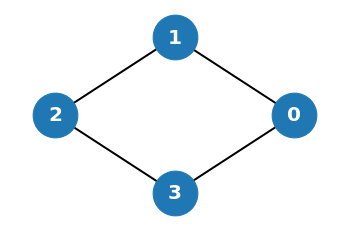

In [2]:
# n is the number of vertices in the graph G, which is also the number of qubits
n = 4
G = nx.Graph()
V = range(n)
G.add_nodes_from(V)
E = [(0, 1), (1, 2), (2, 3), (3, 0)]
G.add_edges_from(E)

# Print out the generated graph G
pos = nx.circular_layout(G)
options = {
    "with_labels": True,
    "font_size": 20,
    "font_weight": "bold",
    "font_color": "white",
    "node_size": 2000,
    "width": 2
}
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

### Encoding Hamiltonian

In Paddle Quantum, a Hamiltonian can be input in the form of `list`. Here we construct the Hamiltonian $H_D$ in equation (36).

In [3]:
# Construct the Hamiltonian H_D in the form of list
H_D_list = []
for (u, v) in E:
    H_D_list.append([-1.0,'z'+str(u) +',z' + str(v)])
print(H_D_list)

[[-1.0, 'z0,z1'], [-1.0, 'z1,z2'], [-1.0, 'z2,z3'], [-1.0, 'z3,z0']]


As you can see, in this example, the Hamiltonian $H_D$ is

$$
H_D = -Z_0Z_1-Z_1Z_2-Z_2Z_3-Z_3Z_0.
\tag{37}
$$

We can view the matrix form of the Hamiltonian $H_D$ and get information of its eigenvalues:

In [4]:
# Convert Hamiltonian H_D from list form to matrix form
H_D_matrix = pauli_str_to_matrix(H_D_list, n)
# Take out the elements on the diagonal of H_D
H_D_diag = np.diag(H_D_matrix).real
# Get the maximum eigenvalue of H_D
H_max = np.max(H_D_diag)

print(H_D_diag)
print('H_max:', H_max)

[-4.  0.  0.  0.  0.  4.  0.  0.  0.  0.  4.  0.  0.  0.  0. -4.]
H_max: 4.0


### Building the QAOA circuit

Earlier we introduced that QAOA needs to apply two unitary transformations $U_C(\gamma)$ and $U_B(\beta)$ alternately on the initial state $|s\rangle = |+\rangle^{\otimes n}$. Here, we use the quantum gates and quantum circuit templates provided in Paddle Quantum to build a quantum circuit to achieve this step. It should be noted that in the Max-Cut Problem, we simplify the problem of maximizing the expected value of the Hamiltonian $H_C$ to the problem of maximizing the expected value of the Hamiltonian $H_D$, so the unitary transformations to be used are $U_D(\gamma)$ and $U_B(\beta)$. By alternately placing two circuit modules with adjustable parameters, we are able to build a QAOA circuit

$$
U_B(\beta_p)U_D(\gamma_p)\cdots U_B(\beta_1)U_D(\gamma_1),
\tag{38}
$$

where $U_D(\gamma) = e^{-i\gamma H_D}$ can be constructed with the circuit in the figure below. Another unitary transformation $U_B(\beta)$ is equivalent to applying a $R_x$ gate to each qubit.

![U_D circuit](figures/qaoa-fig-cir_ud.png "Figure 3: Quantum circuit of unitary transformation $e^{i\gamma Z\otimes Z}$")
<div style="text-align:center">Figure 3: Quantum circuit of unitary transformation $e^{i\gamma Z\otimes Z}$</div>

Therefore, the quantum circuit that realizes a layer of unitary transformation $U_B(\beta)U_D(\gamma)$ is shown in Figure 4.

![U_BU_D circuit](figures/qaoa-fig-cir_ubud.png "Figure 4: Quantum circuit of unitary transformation $U_B(\beta)U_D(\gamma)$")
<div style="text-align:center">Figure 4: Quantum circuit of unitary transformation $U_B(\beta)U_D(\gamma)$  </div>

In Paddle Quantum, the default initial state of each qubit is $|0\rangle$ (the initial state can be customized by input parameters). We can add a layer of Hadamard gates to change the state of each qubit from $|0\rangle$ to $|+\rangle$ so that we get the initial state $|s\rangle = |+\rangle^{\otimes n}$ required by QAOA. In Paddle Quantum, we can add a layer of Hadamard gates to the quantum circuit by calling `superposition_layer()`.



In [5]:
def circuit_QAOA(p, gamma, beta):
    # Initialize the quantum circuit of n qubits
    cir = UAnsatz(n)
    # Prepare quantum state |s>
    cir.superposition_layer()
    # Build a circuit with p layers
    for layer in range(p):
        # Build the circuit of U_D
        for (u, v) in E:
            cir.cnot([u, v])
            cir.rz(gamma[layer], v)
            cir.cnot([u, v])

        # Build the circuit of U_B, that is, add a layer of R_x gates
        for v in V:
            cir.rx(beta[layer], v)

    return cir

After running the constructed QAOA quantum circuit, we obtain the output state

$$
|\vec{\gamma},\vec{\beta}\rangle = U_B(\beta_p)U_D(\gamma_p)\cdots U_B(\beta_1)U_D(\gamma_1)|s\rangle.
\tag{39}
$$

### Calculating the loss function

From the output state of the circuit built in the previous step, we can calculate the objective function of the maximum cut problem

$$
F_p(\vec{\gamma},\vec{\beta}) = \langle\vec{\gamma},\vec{\beta}|H_D|\vec{\gamma},\vec{\beta}\rangle.
\tag{40}
$$

To maximize the objective function is equivalent to minimizing $-F_p$. Therefore, we define $L(\vec{\gamma},\vec{\beta}) = -F_p(\vec{\gamma},\vec{\beta})$ as the loss function, that is, the function to be minimized. Then, we use a classical optimization algorithm to find the optimal parameters $\vec{\gamma},\vec{\beta}$. The following code shows a complete QAOA network built with Paddle Quantum and PaddlePaddle:

In [6]:
class Net(paddle.nn.Layer):
    def __init__(self, p, dtype="float64",):
        super(Net, self).__init__()

        self.p = p
        self.gamma = self.create_parameter(shape=[self.p], 
                                           default_initializer=paddle.nn.initializer.Uniform(low=0.0, high=2 * PI), 
                                           dtype=dtype, is_bias=False)
        self.beta = self.create_parameter(shape=[self.p], 
                                          default_initializer=paddle.nn.initializer.Uniform(low=0.0, high=2 * PI), 
                                          dtype=dtype, is_bias=False)

    def forward(self):
        # Define QAOA's quantum circuit
        cir = circuit_QAOA(self.p, self.gamma, self.beta)
        # Run the quantum circuit
        cir.run_state_vector()
        # Calculate the loss function
        loss = -cir.expecval(H_D_list)

        return loss, cir

### Training quantum neural network

After defining the quantum neural network for QAOA, we use the gradient descent method to update the parameters in the network to maximize the expected value in equation (40).

In [7]:
p = 4      # Number of layers in the quantum circuit
ITR = 120  # Number of training iterations
LR = 0.1   # Learning rate of the optimization method based on gradient descent
SEED = 1024 # Set global RNG seed 

Here, we optimize the network defined above in PaddlePaddle.

In [8]:
paddle.seed(SEED)

net = Net(p)
# Use Adam optimizer
opt = paddle.optimizer.Adam(learning_rate=LR, parameters=net.parameters())
# Gradient descent iteration
for itr in range(1, ITR + 1):
    # Run the network defined above
    loss, cir = net()
    # Calculate the gradient and optimize
    loss.backward()
    opt.minimize(loss)
    opt.clear_grad()
    if itr% 10 == 0:
        print("iter:", itr, "loss:", "%.4f"% loss.numpy())

gamma_opt = net.gamma.numpy()
print("Optimized parameters gamma:\n", gamma_opt)
beta_opt = net.beta.numpy()
print("Optimized parameters beta:\n", beta_opt)

iter: 10 loss: -3.8886
iter: 20 loss: -3.9134
iter: 30 loss: -3.9659
iter: 40 loss: -3.9906
iter: 50 loss: -3.9979
iter: 60 loss: -3.9993
iter: 70 loss: -3.9998
iter: 80 loss: -3.9999
iter: 90 loss: -4.0000
iter: 100 loss: -4.0000
iter: 110 loss: -4.0000
iter: 120 loss: -4.0000
Optimized parameters gamma:
 [3.14046713 0.73681226 4.99897226 0.46481489]
Optimized parameters beta:
 [0.82379898 2.50618308 4.85422542 1.90024859]


### Decoding the quantum solution

After obtaining the minimum value of the loss function and the corresponding set of parameters $\vec{\gamma}^*,\vec{\beta}^*$, our task has not been completed. In order to obtain an approximate solution to the Max-Cut Problem, it is necessary to decode the solution to the classical optimization problem from the quantum state $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ output by QAOA. Physically, to decode a quantum state, we need to measure it and then calculate the probability distribution of the measurement results:

$$
p(z)=|\langle z|\vec{\gamma}^*,\vec{\beta}^*\rangle|^2.
\tag{41}
$$

Usually, the greater the probability of a certain bit string, the greater the probability that it corresponds to an optimal solution of the Max-Cut problem.

Paddle Quantum provides a function to view the probability distribution of the measurement results of the state output by the QAOA quantum circuit:

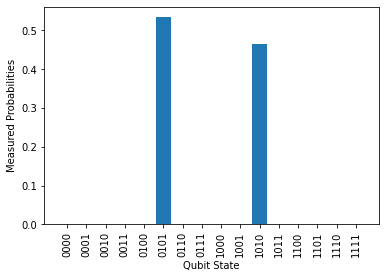

In [9]:
# Repeat the simulated measurement of the circuit output state 1024 times
prob_measure = cir.measure(plot=True)

After measurement, we can find the bit string with the highest probability of occurrence. Let the vertices whose bit values are $0$ in the bit string belong to the set $S_0$ and the vertices whose bit values are $1$ belong to the set $S_1$. The set of edges between these two vertex sets is a possible maximum cut of the graph.

The following code selects the bit string with the greatest chance of appearing in the measurement result, then maps it back to the classic solution, and draws the corresponding maximum cut:
- The red vertex belongs to the set $S_0$,
- The blue vertex belongs to the set $S_1$,
- The dashed line indicates the edge being cut.

The bit string form of the cut found: 0101


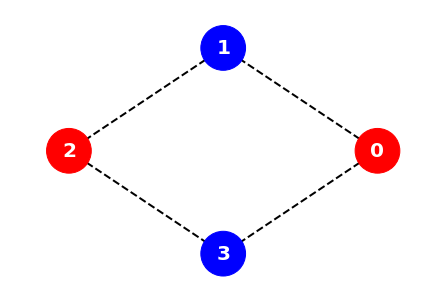

In [10]:
# Find the most frequent bit string in the measurement results
cut_bitstring = max(prob_measure, key=prob_measure.get)
print("The bit string form of the cut found:", cut_bitstring)

# Draw the cut corresponding to the bit string obtained above on the graph
node_cut = ["blue" if cut_bitstring[v] == "1" else "red" for v in V]

edge_cut = [
    "solid" if cut_bitstring[u] == cut_bitstring[v] else "dashed"
    for (u, v) in E
    ]
nx.draw(
        G,
        pos,
        node_color=node_cut,
        style=edge_cut,
        **options
)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

As you can see, in this example, QAOA has found a maximum cut on the graph.


_______

## References

[1] Farhi, E., Goldstone, J. & Gutmann, S. A Quantum Approximate Optimization Algorithm. [arXiv:1411.4028 (2014).](https://arxiv.org/abs/1411.4028)

[2] Farhi, E., Goldstone, J., Gutmann, S. & Sipser, M. Quantum computation by adiabatic evolution. [arXiv:quant-ph/0001106 (2000).](https://arxiv.org/abs/quant-ph/0001106)

[3] Duan, R. Quantum Adiabatic Theorem Revisited. [arXiv:2003.03063 (2020).](https://arxiv.org/abs/2003.03063)